# 0.0 Imports

In [5]:
import warnings

import pandas as pd
import numpy  as np
import os
 
from matplotlib            import pyplot as plt
from sklearn.linear_model  import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics       import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [6]:
warnings.filterwarnings( 'ignore')

# 1.0  Load Datasets

In [7]:
# executando o arquivo metrics_functions
get_ipython().run_line_magic('run', 'Metrics_functions.ipynb')

In [8]:
# carregando os dados
x_train, y_train, x_val, y_val, x_test, y_test = load_data('regressao')

# 2.0 Training Model

In [9]:
# treinamento 
Poly = PolynomialFeatures()
x_poly= Poly.fit_transform(x_train)
Poly_ridge = Ridge()
Poly_ridge.fit(x_poly, y_train)

#predict
y_pred = Poly_ridge.predict(x_poly) 

# performance
metrics(y_train, y_pred, 'Treinamento')

# guarando resultados
r2_train, mse_train, rmse_train, mae_train, mape_train = save_metrics(y_train, y_pred)

Metricas de Treinamento: 
R2:   0.093
MSE:  433.475
RMSE: 20.82
MAE:  16.472
MAPE: 8.373


## 2.1 Performance on Validation Data

In [10]:
# treinamento 
Poly = PolynomialFeatures()
x_poly= Poly.fit_transform(x_train)
x_poly_val= Poly.fit_transform(x_val)
Poly_ridge = Ridge()
Poly_ridge.fit(x_poly, y_train)

#predict
y_pred_val = Poly_ridge.predict(x_poly_val) 

#performance
metrics(y_val, y_pred_val, 'Validação')

# guardando resultados
r2_val, mse_val, rmse_val, mae_val, mape_val = save_metrics(y_val, y_pred_val)

Metricas de Validação: 
R2:   0.068
MSE:  445.184
RMSE: 21.099
MAE:  16.739
MAPE: 8.569


## 2.2 Finding The best Parameter

### Parameter
* Degree

In [11]:
values = np.arange(1, 5)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [12]:
for i in values:
    # treinamento 
    Poly = PolynomialFeatures(degree = i)
    x_poly= Poly.fit_transform(x_train)
    x_poly_val= Poly.fit_transform(x_val)
    Poly_ridge = Ridge()
    Poly_ridge.fit(x_poly, y_train)
    
    #predict
    y_pred_val = Poly_ridge.predict(x_poly_val) 

    #performance
    r2, mse, rmse, mae, mape = save_metrics(y_val, y_pred_val)

    #guarando resultados
    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

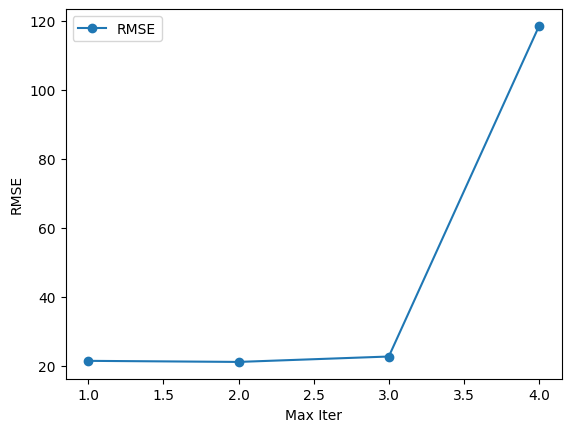

In [13]:
# Visualização da metrica
plt.plot(values, rmse_list, marker = 'o', label = 'RMSE')
plt.xlabel('Max Iter')
plt.ylabel('RMSE')
plt.legend()

In [14]:
best_degree = values[np.argmin(rmse_list)]
best_degree

2

### Parameter
* Alpha

In [15]:
values = np.arange(0, 7, 0.2)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [16]:
for i in values:
    # treinamento 
    Poly = PolynomialFeatures(degree = best_degree)
    x_poly= Poly.fit_transform(x_train)
    x_poly_val= Poly.fit_transform(x_val)
    Poly_ridge = Ridge(alpha = i)
    Poly_ridge.fit(x_poly, y_train)
    
    #predict
    y_pred_val = Poly_ridge.predict(x_poly_val) 

    #performance
    r2, mse, rmse, mae, mape = save_metrics(y_val, y_pred_val)

    #guarando resultados
    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

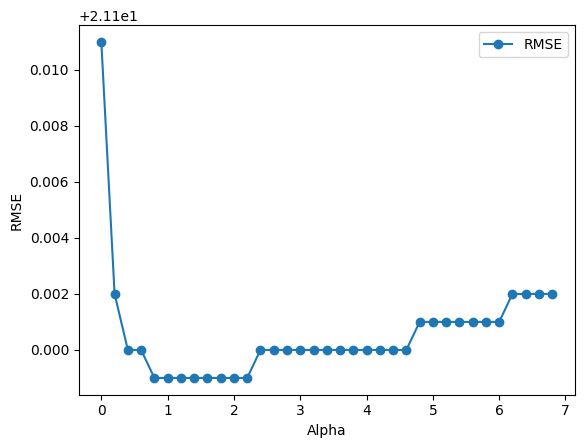

In [17]:
# Visualização da metrica
plt.plot(values, rmse_list, marker = 'o', label = 'RMSE')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()

In [18]:
best_alpha = values[np.argmin(rmse_list)]
best_alpha

0.8

### Parameter
* Max Iter

In [19]:
values = np.arange(100, 1500, 100)

r2_list = []
mse_list = []
rmse_list = []
mae_list = []
mape_list = []

In [20]:
for i in values:
    # treinamento 
    Poly = PolynomialFeatures(degree = best_degree)
    x_poly= Poly.fit_transform(x_train)
    x_poly_val= Poly.fit_transform(x_val)
    Poly_ridge = Ridge(alpha = best_alpha, max_iter = i)
    Poly_ridge.fit(x_poly, y_train)
    
    #predict
    y_pred_val = Poly_ridge.predict(x_poly_val) 

    #performance
    r2, mse, rmse, mae, mape = save_metrics(y_val, y_pred_val)

    #guarando resultados
    r2_list.append(r2)
    mse_list.append(mse)
    rmse_list.append(rmse)
    mae_list.append(mae)
    mape_list.append(mape)

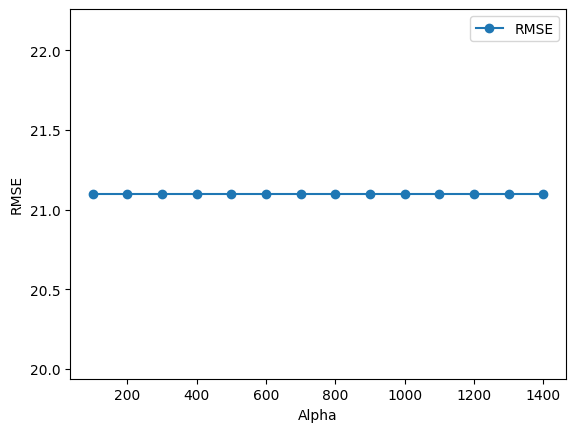

In [21]:
# Visualização da metrica
plt.plot(values, rmse_list, marker = 'o', label = 'RMSE')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.legend()

In [22]:
best_iter = values[np.argmin(rmse_list)]
best_iter

100

## 2.3 Performance on Test Data

In [23]:
# treinamento 
Poly = PolynomialFeatures(degree = best_degree)
x_poly= Poly.fit_transform(x_train)
x_poly_val= Poly.fit_transform(x_val)
x_poly_test= Poly.fit_transform(x_test)
Poly_ridge = Ridge(alpha = best_alpha, max_iter = best_iter)
Poly_ridge.fit(np.concatenate((x_poly, x_poly_val)),
               np.concatenate((y_train, y_val)))

#predict
y_pred_test = Poly_ridge.predict(x_poly_test)

# performance
metrics(y_test, y_pred_test, 'Teste')

# guardando resultados
r2_test, mse_test, rmse_test, mae_test, mape_test = save_metrics(y_test, y_pred_test)

Metricas de Teste: 
R2:   0.09
MSE:  442.889
RMSE: 21.045
MAE:  16.741
MAPE: 8.305


# 3.0 Save Results

In [24]:
train_metrics = {
    'Algoritmo': 'Polynomial_Regression - Ridge',
    'R2'   : r2_train,
    'MSE'  : mse_train,
    'RMSE' : rmse_train,
    'MAE'  : mae_train, 
    'MAPE' : mape_train
}
validation_metrics = {
    'Algoritmo': 'Polynomial_Regression - Ridge',
    'R2'   : r2_val,
    'MSE'  : mse_val,
    'RMSE' : rmse_val,
    'MAE'  : mae_val, 
    'MAPE' : mape_val
}
test_metrics = {
    'Algoritmo': 'Polynomial_Regression - Ridge',
    'R2'   : r2_test,
    'MSE'  : mse_test,
    'RMSE' : rmse_test,
    'MAE'  : mae_test, 
    'MAPE' : mape_test
}

train = pd.DataFrame([train_metrics])
validation = pd.DataFrame([validation_metrics])
test = pd.DataFrame([test_metrics])

train.to_csv(
    './train_metrics_regressao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./train_metrics_regressao.csv')
)

validation.to_csv(
    './validation_metrics_regressao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./validation_metrics_regressao.csv')
)

test.to_csv(
    './test_metrics_regressao.csv',
    mode ='a',
    index=False,
    header=not os.path.exists('./test_metrics_regressao.csv')

)